## Q1) Delivery_time -> Predict delivery time using sorting time
## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
# Import the required libraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("D:\Assignment\Assignments -4\delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
#DATA CLEANING
# No Null values/ Incorerect values
# Remove the spaces in the column names
data.columns = data.columns.str.replace(' ','_')
data.columns
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting_Time'>

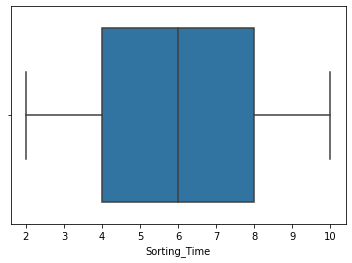

In [7]:
# OUTLIERS  DETECTION
#using box plot for Sorting_Time
sns.boxplot(data['Sorting_Time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting_Time'>

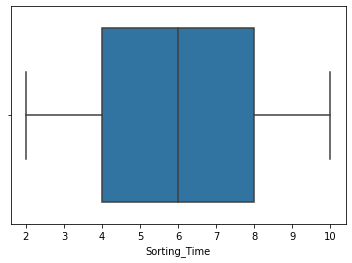

In [8]:
#using box plot for Delivery_Time
sns.boxplot(data['Sorting_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

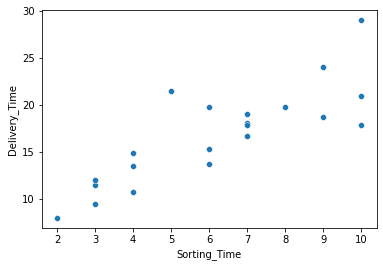

In [9]:
# Use scatter plot
sns.scatterplot(x = data['Sorting_Time'], y = data['Delivery_Time'])

In [10]:
# Find out using the correlation
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [12]:
## The correclation is around +0.83, Highly correlated

Building the model
- Only one independent variable(x) is given to predict the dependent variable(y).
- Both the variables are linearly related and y is continuous in nature.
- Hence use can the simple linear regression model

In [13]:
# Import the statsmodel library
import statsmodels.formula.api as smf

In [14]:
# Use the OLS model
model = smf.ols('Delivery_Time ~ Sorting_Time', data=data)
# Fit the model
model_fit = model.fit()

## RESULTS

In [17]:

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        12:02:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Findings:
- Here the r square value is 0.682. Which is not so great but, as we are using only one variable to predict, it is acceptable.
- p-value < 0.05, (if we use the hypothesis concept here, we can accept the alternate hypothesis) We can conclude that the Sorting_Time variable is a good predictor for Delivery_Time.

## Defining a best fit line based on the data we analyzed

In [18]:
# Check the model parameters(β0, β1)
model_fit.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [20]:
## Predicting the Delivery_Time using the model we built
## Predicting using new_data

In [21]:
# creating a series of Sorting_Time with new values
new_data = pd.Series((10,4))
new_data
# creating a DataFrame of new Sorting_Time values
data_pred = pd.DataFrame(new_data, columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,10
1,4


In [22]:
#Prdicting the Delivery_Time using the new Sorting_Time values
pred = model_fit.predict(data_pred)
pred

0    23.072933
1    13.178814
dtype: float64

## Predicting the Delivery_Time using the Sorting_Time column(# Same trained data we are using)

In [24]:
pred1 = model_fit.predict(data.iloc[:,1])
pred1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

## Checking the accuracy of predictons

In [57]:
## Checking the accuracy of predictons
# Finding the accuracy/ how good you model is prdicting
# Use RMSE(Root Mean Squared Error)
mse1 = np.mean((np.array(data['Delivery_Time'])-np.array(pred1))**2)
print('MSE1 =', mse1)
rmse1 = np.sqrt(np.mean((np.array(data['Delivery_Time'])-np.array(pred1))**2))
print('RMSE1 =', rmse1)

MSE1 = 7.793311548584062
RMSE1 = 2.7916503270617654


##  RMSE is 2.8, Less the RMSE value then more the accuracy is.
## So as per the final RMSE value, the model is able to predict the Delivery_Time with almost +/- 2.8 varience using given Sorting _Time.

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

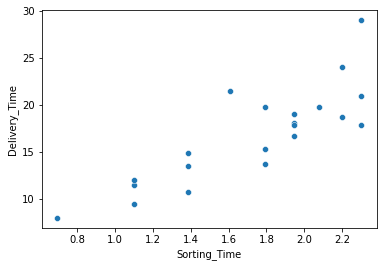

In [27]:
# Model building on Transformed Data
# x = log(Sorting_Time); y = Delivery_Time
sns.scatterplot(x = np.log(data['Sorting_Time']), y = data['Delivery_Time'])

In [29]:
model2 = smf.ols('Delivery_Time ~ np.log(Sorting_Time)', data= data)
model_fit1 = model2.fit()

In [30]:
model_fit1.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [31]:
pred2 = model_fit1.predict(data.iloc[:,1])
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

## Finding the accuracy/ how good you model is prdicting

In [32]:
# Use RMSE(Root Mean Squared Error)
mse2 = np.mean((np.array(data['Delivery_Time'])-np.array(pred2))**2)
print('MSE2 =', mse2)
rmse2 = np.sqrt(np.mean((np.array(data['Delivery_Time'])-np.array(pred2))**2))
print('RMSE2 =', rmse2)

MSE2 = 7.470226320948427
RMSE2 = 2.7331714766820663


In [33]:
## Exponential transformation

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

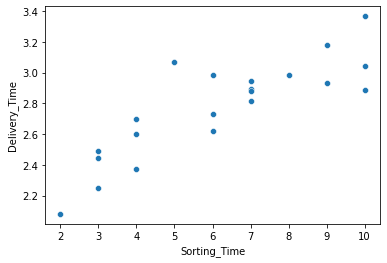

In [35]:
# x = Sorting_Time; y = log(Delivery_Time)
sns.scatterplot(x = data['Sorting_Time'], y = np.log(data['Delivery_Time']))

In [36]:
model3  = smf.ols('np.log(Delivery_Time) ~ Sorting_Time', data = data)
model_fit3 = model3.fit()
model_fit3.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [37]:
pred3 = model_fit3.predict(data.iloc[:,1])
pred3_final = np.exp(pred3)
pred3_final

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [38]:
   ## Finding the accuracy/ how good you model is prdicting

In [39]:
# Use RMSE(Root Mean Squared Error)
mse3 = np.mean((np.array(data['Delivery_Time'])-np.array(pred3_final))**2)
print('MSE3 =', mse3)
rmse3 = np.sqrt(np.mean((np.array(data['Delivery_Time'])-np.array(pred3_final))**2))
print('RMSE3 =', rmse3)

MSE3 = 8.645071962232093
RMSE3 = 2.9402503230562007


In [40]:
## Polynomial transformation

In [41]:
# x = Sorting_Time; x^2 = Sorting_Time*Sorting_Time; y = log(Delivery_Time)
model4 = smf.ols('np.log(Delivery_Time) ~ Sorting_Time + I(Sorting_Time*Sorting_Time)', data = data)
model_fit4 = model4.fit()
model_fit4.params

Intercept                         1.699704
Sorting_Time                      0.265922
I(Sorting_Time * Sorting_Time)   -0.012841
dtype: float64

In [42]:
pred4 = model_fit4.predict(data.iloc[:,1])
pred4_final = np.exp(pred4)
pred4_final

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

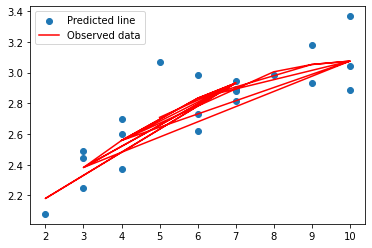

In [45]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = data.iloc[:,1:2].values
X_poly = poly_reg.fit_transform(X)
# y = data.iloc[:, 0].values

plt.scatter(data.Sorting_Time, np.log(data.Delivery_Time))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show() 

## Finding the accuracy/ how good you model is prdicting

In [51]:
# Use RMSE(Root Mean Squared Error)
mse4 = np.mean((np.array(data['Delivery_Time'])-np.array(pred4_final))**2)
print('MSE4 =', mse4)
rmse4 = np.sqrt(np.mean((np.array(data['Delivery_Time'])-np.array(pred4_final))**2))
print('RMSE4 =', rmse4)

MSE4 = 7.834636054734763
RMSE4 = 2.799041988740927


## RMSE values of various transformation models

In [58]:
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,2.791650
1,Log model,2.733171
2,Exp model,2.940250
3,Poly model,2.799042


 ## Based on the above table we can conclude that the Log model has low RMSE value, Hence we can use the log model as our final model and make the predictions.